<h1><center>🚀 Python Challenge ~ Lucas Argento 🧑‍💻</center></h1>

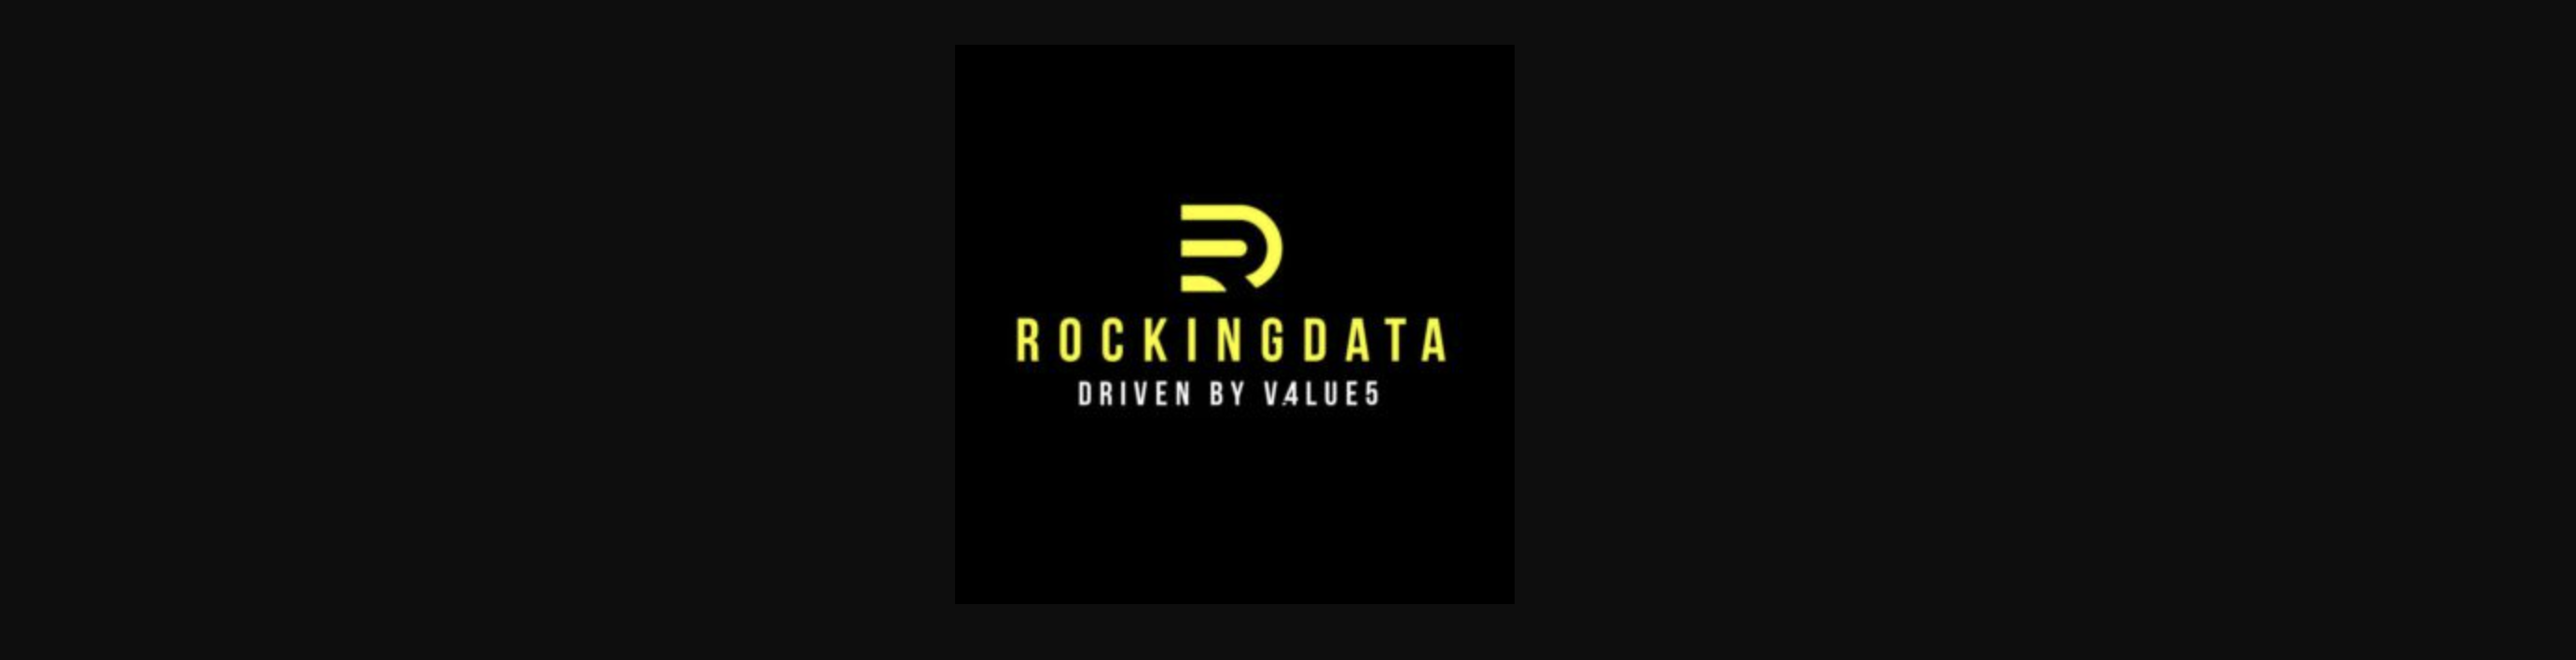


Nuestro cliente, un reconocido banco de Portugal, espera poder entender mejor los datos que su departamento de Marketing tiene sobre sus potenciales suscriptores. Su principal objetivo a corto plazo es incrementar la cantidad de suscripciones de su servicio X. Para esto, nos ha pedido que encontremos una manera de predecir _que cliente tiene mayor probabilidad de comprar una suscripción_.

En este notebook se analizará el dataset provisto por el banco y se intentarán comprender en profundidad las relaciones entre las diferentes variables de los estados de los clientes y las potenciales suscripciones.

Además, se buscara predecir que clientes se suscribirán al servicio provisto por el banco (bank term deposit). Para esto, se entrenarán y evaluarán distintos modelos de clasificación, aprovechando la potencia del Machine Learning. 

### > Sobre el Dataset

A continuación se detalla una breve descripción de las variables almacenadas en la base de datos provista por el cliente.

#### Datos de clientes:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### Datos relacionados con el ultimo contacto de la campaña actual:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Otros atributos:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Atributos relacionados con el contexto socio-económico:
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Variable a predecir:
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### > Carga de datos y primeros análisis

In [357]:
# Importamos las liberías que vamos a necesitar para los primeros pasos. Si no 
# podes reproducir este paso, asegurate de tener instaladas todas las librerias via pip-install
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [358]:
# cargamos el dataset desde archivo
df = pd.read_csv('bank-additional-full.csv',sep=";")

In [359]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [360]:
print("\n Nuestro dataset tiene ", df.shape[0], " filas y ", df.shape[1], " columnas")


 Nuestro dataset tiene  41188  filas y  21  columnas


In [361]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [362]:
numericalCount = 0
categoricalCount = 0
for types in df.dtypes:
    if types == "int64" or types == "float64":
        numericalCount += 1
    else:
        categoricalCount += 1
print("\nNuestro dataset tiene ", numericalCount, " variables numéricas y ", categoricalCount, " variables categóricas.")


Nuestro dataset tiene  10  variables numéricas y  11  variables categóricas.


In [363]:
# Reemplazamos la variable output Yes/No por 1/0
df["y"].replace(to_replace=["yes","no"], value=[1,0], inplace=True,)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [364]:
df.describe() #numerical values stats

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [365]:
# Como está nuestro dataset en cuanto a valores faltantes?
df.isnull().sum()/df.count()*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

> A simple vista pareciera que nuestro dataset NO tiene valores faltantes. Sin embargo, leyendo la información provista por el cliente, encontramos que en el punto 8 se aclara que los valores faltantes fueron etiquetados como _"Unknowns"_. Del archivo _bank-additional-names.txt_:

> _"8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques."_

> Analizaremos el impacto de los "unknowns" a continuación:

In [366]:
# Cantidad de unknowns para cada categoría:
percentageOfUnknowns = {}
means = {}
for series in df.columns:
    try:
        percentage = df[series].value_counts(normalize=True, sort=True, ascending=False)["unknown"]
        percentageOfUnknowns[series] = round(percentage,4) * 100
        means[series] = df[series].mode()
    except Exception as e:
        # Si salta la exception es porque no hay categoria 'unknown' para esta serie --> 0%
        percentageOfUnknowns[series] = 0

print("\nPorcentaje de Unknowns por categoría: \n")
print(percentageOfUnknowns)
print("\nModas de variables categóricas: \n")
print(means)


Porcentaje de Unknowns por categoría: 

{'age': 0, 'job': 0.8, 'marital': 0.19, 'education': 4.2, 'default': 20.87, 'housing': 2.4, 'loan': 2.4, 'contact': 0, 'month': 0, 'day_of_week': 0, 'duration': 0, 'campaign': 0, 'pdays': 0, 'previous': 0, 'poutcome': 0, 'emp.var.rate': 0, 'cons.price.idx': 0, 'cons.conf.idx': 0, 'euribor3m': 0, 'nr.employed': 0, 'y': 0}

Modas de variables categóricas: 

{'job': 0    admin.
dtype: object, 'marital': 0    married
dtype: object, 'education': 0    university.degree
dtype: object, 'default': 0    no
dtype: object, 'housing': 0    yes
dtype: object, 'loan': 0    no
dtype: object}


> Contamos un maximo de ~ 4 % de valores faltantes para la categoría 'education'. El resto de las variables categóricas tiene valores aún mas bajos de faltantes. Como nuestro dataset tiene una cantidad apreciable de filas y las cantidades de missing values son bajas, eliminaremos estas entradas de la base de datos para no tener que tratar con unknowns. 
Otra alternativa podría ser reemplazar los valores faltantes por la media/moda de la categoría. Sin embargo, como se trata de variables categóricas y no quiero _condicionar_ los resultados aumentando la cantidad de una de las categorías, se optará por eliminar las entradas.

> La categoria Default tiene un 20% de unknowns! Sin embargo esta categoría sera eliminada por completo en pasos siguientes. Se profundiza en el tema mas adelante.

In [367]:
# eliminamos filas del dataset que contengan 'unknown' en alguna de sus columnas
rowsBefore = df.shape[0]
print("Antes de limpiar el dataset tenía ", rowsBefore, 'filas')
for index,row in df.iterrows():
    countUnknowns = 0
    columns = ['job','marital','education','housing','loan']
    for column in columns: # solo me importan las columnas categoricas, no loopeo por todas para reducir tiempos de computo
        if row[column] == 'unknown':
            countUnknowns += 1
    if countUnknowns > 0:
        df.drop(index = index,axis = 0, inplace = True)
rowsAfter = df.shape[0]

print("\n> Se eliminaron ", rowsBefore-rowsAfter, " filas. El dataset ahora tiene ",rowsAfter," filas. Corresponde a una périda del ",round((rowsBefore-rowsAfter)/rowsBefore,2) * 100, "% del dataset")

Antes de limpiar el dataset tenía  41188 filas

> Se eliminaron  2943  filas. El dataset ahora tiene  38245  filas. Corresponde a una périda del  7.000000000000001 % del dataset


> Si bien un 7% de datos eliminados es un numero apreciable, prefiero perder estas filas y no condicionar el análisis a partir de un reemplazo de valores. La cantidad total de filas sigue siendo importante y por lo tanto los resultados predictivos y el nivel de significación del análisis no se debería ver muy perjudicado.

### 📈📉 Análisis por categorías

A continuación se realizará un análisis descriptivo para cada una de las categorías del dataset

### Age

In [368]:
df["age"].describe()

count    38245.000000
mean        39.860871
std         10.289488
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

<AxesSubplot:>

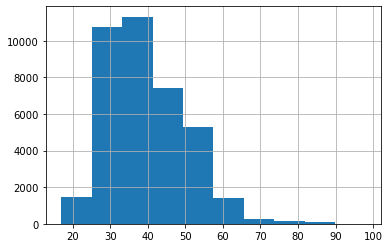

In [369]:
df["age"].hist()

La mayor cantidad de clientes del banco se encuentra en el rango etario de los 25-40 años, seguido por 40-50 en segundo lugar y 50-55 en tercero

Veamos como afecta el rango etario a la variable de salida.. Hay algun rango etario mas propenso a suscribirse?

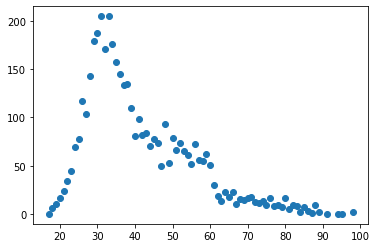

In [370]:
agevsy = df.groupby(["age"]).agg({"y":"sum"})
agevsy
plt.scatter(x=agevsy.index,y="y",data=agevsy)

Notar que la mayor cantidad de positivos se encuentra en el rango de los 30 años. Sin embargo, esta conclusión podria estar sesgada ya que tenemos un numero mucho mas alto de clientes dentro de este rango etario. Para eliminar este posible sesgo, analicemos un grafico porcentual para los distintos rangos etarios. 

> Primero agrupamos las edades en rangos de 10 años:

In [371]:
bins = [17, 20, 30,40,50,60,70,80,90,100]
names = ["17-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]

df['AgeRange'] = pd.cut(df['age'], bins, labels=names)
df[["age","AgeRange"]]

,age,AgeRange
0,56,50-60
1,57,50-60
2,37,30-40
3,40,30-40
4,56,50-60
...,...,...
41183,73,70-80
41184,46,40-50
41185,56,50-60
41186,44,40-50


In [372]:
stackdf = pd.DataFrame()

totals = df.groupby("AgeRange").agg({"y":"count"})["y"].tolist() # contar cuenta los ceros tambien -> total casos
positives = df.groupby("AgeRange").agg({"y":"sum"})["y"].tolist() # como la categoria positive = 1, sumar cuenta los positivos

negatives = []
for x in totals:
    negatives.append(x-positives[totals.index(x)])

stackdf["Positives"] = df.groupby("AgeRange").agg({"y":"sum"})["y"]
stackdf["Negatives"] = negatives
stackdf["Totals"] = totals
stackdf

,Positives,Negatives,Totals
AgeRange,,,
17-20,32,57,89
20-30,981,5811,6792
30-40,1520,13983,15503
40-50,761,8638,9399
50-60,614,5068,5682
60-70,182,227,409
70-80,120,145,265
80-90,46,52,98
90-100,2,4,6


In [373]:
stackdf["SuccessRate%"] = round((stackdf["Positives"]/stackdf["Totals"])*100,1)
stackdf

,Positives,Negatives,Totals,SuccessRate%
AgeRange,,,,
17-20,32,57,89,36.0
20-30,981,5811,6792,14.4
30-40,1520,13983,15503,9.8
40-50,761,8638,9399,8.1
50-60,614,5068,5682,10.8
60-70,182,227,409,44.5
70-80,120,145,265,45.3
80-90,46,52,98,46.9
90-100,2,4,6,33.3


(0.0, 100.0)

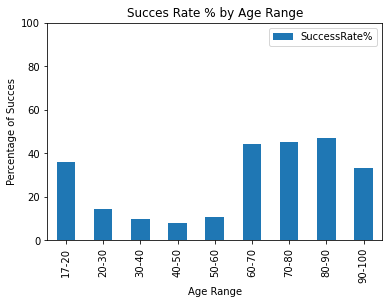

In [374]:
stackdf[["SuccessRate%"]].plot(kind='bar')

plt.title('Succes Rate % by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage of Succes')
plt.ylim(0,100)

> Notamos que en terminos porcentuales los numeros cambian. Sin embargo, vale hacer una aclaración mas: las muestras de clientes entre 20 y 60 rondan los miles de registros, mientras que los clientes con edades por fuera de este rango no superan los 200 registros. Tomemos en cuenta estos _bins_ que son los mas significativos en cuanto a datos:

(0.0, 25.0)

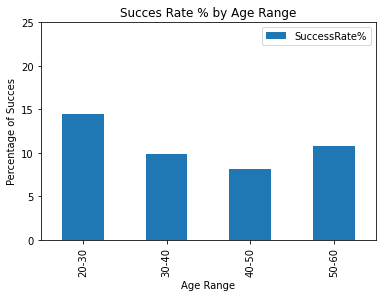

In [375]:
stackdf = stackdf[stackdf["Totals"] > 500]
stackdf[["SuccessRate%"]].plot(kind='bar')

plt.title('Succes Rate % by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage of Succes')
plt.ylim(0,25)

> Reduciendo el análisis a los casos con mas de 500 registros y entendiendo estas muestras como significativas, podemos conlcuir que los clientes con edades entre 20 y 30 años son los que mas probabilidad de suscribirse tienen, seguidos por los del rango etario 50-60.

### Job

In [376]:
df["job"].describe()
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

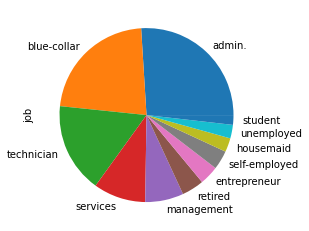

In [377]:
df["job"].value_counts().plot.pie().set_facecolor('lightgrey')

> Las malas lenguas dicen que un gráfico de torta no siempre es la opción mas didactica para mostrar información... probemos con uno de barras:

<AxesSubplot:>

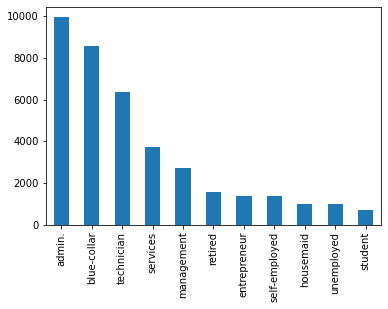

In [378]:
df["job"].value_counts().sort_values(ascending=False).plot.bar()

> Sería interesante entender cual de las categorías de trabajos tiene una mayor cantidad de casos positivos en nuestra variable output..

In [379]:
df.groupby("job").agg({'y':'sum'})

,y
job,
admin.,1283
blue-collar,595
entrepreneur,116
housemaid,98
management,304
retired,390
self-employed,146
services,297
student,208


In [380]:
# vamos a modularizar el codigo utilizado anteriormente para calcular el impacto sobre la variable output con una funcion
def compareToOutput(series,plot):
    '''Esta funcion compara los resultados de "y" vs la serie analizada'''
    stackdf = pd.DataFrame()
    totals = df.groupby(series).agg({"y":"count"})["y"].tolist() # contar cuenta los ceros tambien -> total casos
    positives = df.groupby(series).agg({"y":"sum"})["y"].tolist() # como la categoria positive = 1, sumar cuenta los positivos

    negatives = []
    for x in totals:
        negatives.append(x-positives[totals.index(x)])

    stackdf["Positives"] = df.groupby(series).agg({"y":"sum"})["y"]
    stackdf["Negatives"] = negatives
    stackdf["Totals"] = totals
    print(stackdf)
    print("\n")
    #stacked bar plot
    if plot == "bar":
        stackdf["SuccessRate%"] = round((stackdf["Positives"]/stackdf["Totals"])*100,1)
        stackdf[["SuccessRate%"]].plot(kind='bar')
        plt.title('Succes Rate % by '+series)
        plt.xlabel(series)
        plt.ylabel('Percentage of Succes')
        plt.ylim(0,100)
    #scatter plot
    elif plot == "scatter":
        agevsy = df.groupby([series]).agg({"y":"sum"})
        agevsy
        plt.scatter(x=agevsy.index,y="y",data=agevsy)

               Positives  Negatives  Totals
job                                        
admin.              1283       8654    9937
blue-collar          595       7965    8560
entrepreneur         116       1244    1360
housemaid             98        889     987
management           304       2424    2728
retired              390       1187    1577
self-employed        146       1203    1349
services             297       3419    3716
student              208        480     688
technician           683       5697    6380
unemployed           138        825     963




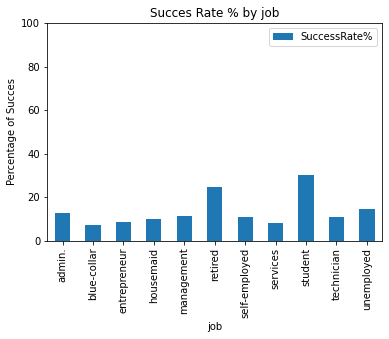

In [381]:
compareToOutput("job","bar")

> Vemos que las categorías que más invierten en el servicio son los estudiantes y los retirados. Esto podría deberse a que la gente que tiene estas ocupaciones suele tener menor cantidad de gastos.

### Marital

In [382]:
df["marital"].describe()

count       38245
unique          3
top       married
freq        23183
Name: marital, dtype: object

In [383]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

<AxesSubplot:>

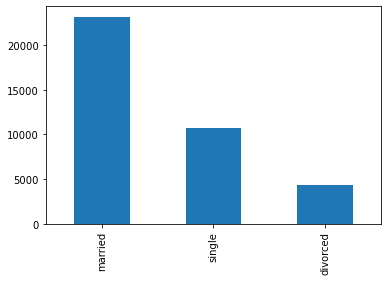

In [384]:
df["marital"].value_counts().sort_values(ascending=False).plot.bar()

In [385]:
df.groupby("job").agg({'y':'sum'})

,y
job,
admin.,1283
blue-collar,595
entrepreneur,116
housemaid,98
management,304
retired,390
self-employed,146
services,297
student,208


          Positives  Negatives  Totals
marital                               
divorced        448       3854    4302
married        2341      20842   23183
single         1469       9291   10760




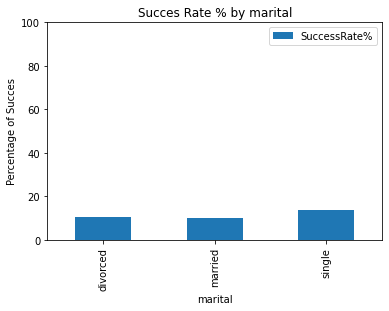

In [386]:
compareToOutput("marital","bar")

> Si bien ninguna de las categorías tiene un impacto muy significativo, vemos que los solteros tienen una mayor probabilidad de adquirir la suscripción.

### Education

Como estamos realizando un análisis similar para las variables categóricas, vamos a resumir los pasos anteriores (para cada categoría) en una función:

In [387]:
def describeCategory(series):
    print("-----------------")
    print("\n> Descripción de la categoría:\n")
    print(df[series].describe())
    print("\n-----------------")
    print("\n> Valores únicos de la categoría:\n")
    print(df[series].unique())
    print("\n-----------------")
    print("\n> Cantidad de outputs positivos por valor:\n")
    print(df.groupby(series).agg({'y':'sum'}))
    print("\n-----------------")
    print("\n> Valores mas significativos:\n")
    df[series].value_counts().sort_values(ascending=False).plot.bar()

-----------------

> Descripción de la categoría:

count                 38245
unique                    7
top       university.degree
freq                  11821
Name: education, dtype: object

-----------------

> Valores únicos de la categoría:

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

-----------------

> Cantidad de outputs positivos por valor:

                        y
education                
basic.4y              412
basic.6y              180
basic.9y              457
high.school          1007
illiterate              4
professional.course   578
university.degree    1620

-----------------

> Valores mas significativos:



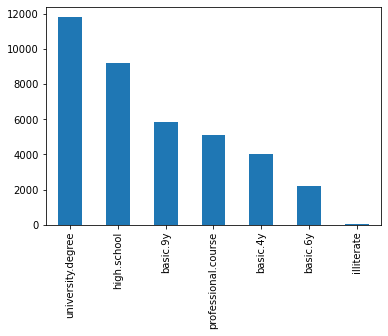

In [388]:
describeCategory("education")

> El análisis indica que la mayor cantidad de clientes del banco tiene un título universitario o bien el secundario completo. Son muy pocos los clientes que que no tienen ningun tipo de educación

                     Positives  Negatives  Totals
education                                        
basic.4y                   412       3590    4002
basic.6y                   180       2024    2204
basic.9y                   457       5399    5856
high.school               1007       8237    9244
illiterate                   4         14      18
professional.course        578       4522    5100
university.degree         1620      10201   11821




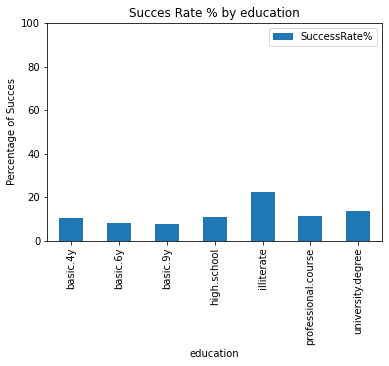

In [389]:
# analizamos el comportamiento de la variable educacion con el output
compareToOutput("education","bar")

> A simple vista parece raro que la categoría sin estudios sea la que mejor performa contra el output. Sin embargo, analizando la cantidad de muestras para esta categoría, vemos que es muy chica y no tiene un verdadera significancia. Teniendo esto en cuenta, la categoría con mejor ratio de positivos es la de los clientes con titulo universitario.

### Default

_has credit in default? (categorical: "no","yes","unknown")_

-----------------

> Descripción de la categoría:

count     38245
unique        3
top          no
freq      30485
Name: default, dtype: object

-----------------

> Valores únicos de la categoría:

['no' 'unknown' 'yes']

-----------------

> Cantidad de outputs positivos por valor:

            y
default      
no       3859
unknown   399
yes         0

-----------------

> Valores mas significativos:



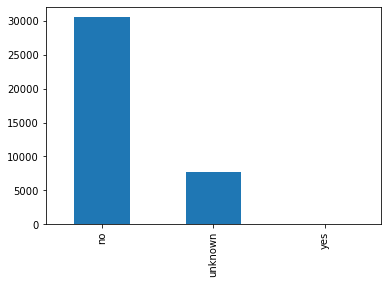

In [390]:
describeCategory("default")

> Solamente tenemos 3 clientes con default = yes. 

In [391]:
df["default"].value_counts().sort_values(ascending=False)

no         30485
unknown     7757
yes            3
Name: default, dtype: int64

In [392]:
df[df["default"]=="yes"] #parece raro, pero si, hay 3 records yes nomas

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,AgeRange
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,40-50
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,40-50
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0,30-40


         Positives  Negatives  Totals
default                              
no            3859      26626   30485
unknown        399       7358    7757
yes              0          3       3




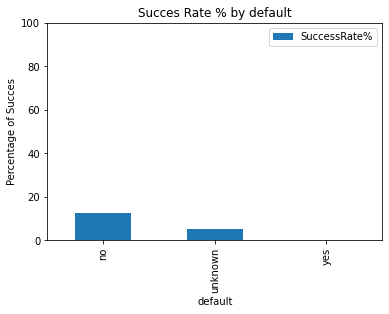

In [393]:
compareToOutput("default","bar")

> Bien podriamos no tener en cuenta esta categoria a la hora del modelado ya que solamente tenemos datos significativos para el caso "NO". Como solo tenemos 3 casos para el SI no podemos asegurar mucho sobre el impacto del default en el output. Además, esta categoría tiene una cantidad de unknowns importante (~20%, ver comienzo de la sección), por lo que tendria sentido no tener en cuenta "default" en lo absoluto. 

In [394]:
# descartamos la categoría
df.drop("default",axis="columns",inplace=True)
df.dtypes

age                  int64
job                 object
marital             object
education           object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
AgeRange          category
dtype: object

### Housing

_has housing loan? (categorical: "no","yes","unknown")_


-----------------

> Descripción de la categoría:

count     38245
unique        2
top         yes
freq      20578
Name: housing, dtype: object

-----------------

> Valores únicos de la categoría:

['no' 'yes']

-----------------

> Cantidad de outputs positivos por valor:

            y
housing      
no       1907
yes      2351

-----------------

> Valores mas significativos:



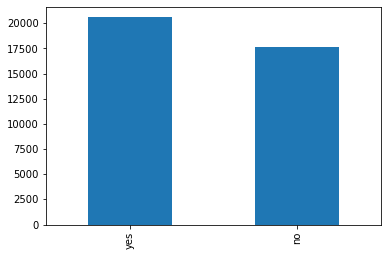

In [395]:
describeCategory("housing")

         Positives  Negatives  Totals
housing                              
no            1907      15760   17667
yes           2351      18227   20578




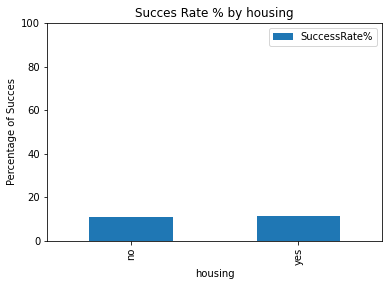

In [396]:
compareToOutput("housing","bar")

> No vemos un impacto tan significativo de esta categoría en el outcome

### Loan

-----------------

> Descripción de la categoría:

count     38245
unique        2
top          no
freq      32286
Name: loan, dtype: object

-----------------

> Valores únicos de la categoría:

['no' 'yes']

-----------------

> Cantidad de outputs positivos por valor:

         y
loan      
no    3619
yes    639

-----------------

> Valores mas significativos:



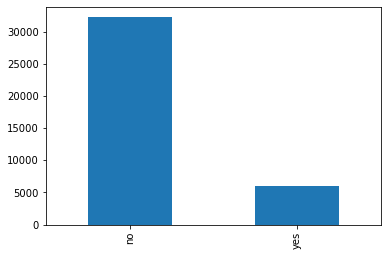

In [397]:
describeCategory("loan")

      Positives  Negatives  Totals
loan                              
no         3619      28667   32286
yes         639       5320    5959




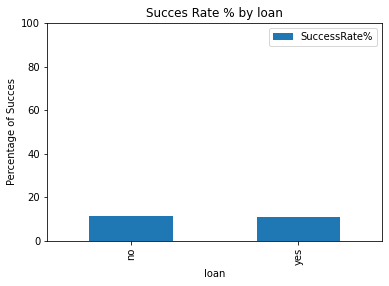

In [398]:
compareToOutput("loan","bar")

> Los datos de success rate para si y no tienen porcentajes relativamente bajos y muy parecidos, es posible que esta variable no afecte mucho al output

### Contact

_Cellular or telephone_

-----------------

> Descripción de la categoría:

count        38245
unique           2
top       cellular
freq         24441
Name: contact, dtype: object

-----------------

> Valores únicos de la categoría:

['telephone' 'cellular']

-----------------

> Cantidad de outputs positivos por valor:

              y
contact        
cellular   3535
telephone   723

-----------------

> Valores mas significativos:



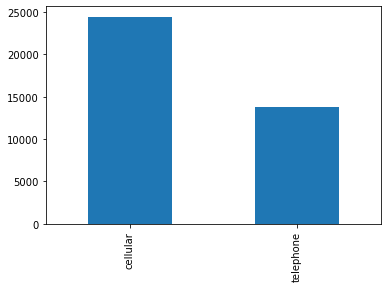

In [399]:
describeCategory("contact")

> La mayoria de contactos fue a celulares. Poca gente hoy en dia usa telefonos fijos

           Positives  Negatives  Totals
contact                                
cellular        3535      20906   24441
telephone        723      13081   13804




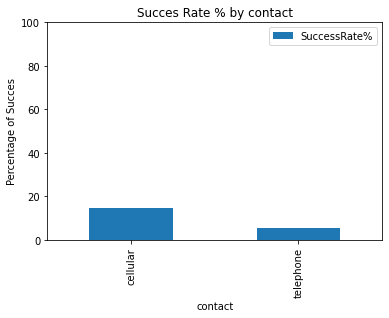

In [400]:
compareToOutput("contact","bar")

> Los contactos por celular fueron mas efectivos que los de telefono fijo

### Month

_last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")_

-----------------

> Descripción de la categoría:

count     38245
unique       10
top         may
freq      12794
Name: month, dtype: object

-----------------

> Valores únicos de la categoría:

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

-----------------

> Cantidad de outputs positivos por valor:

         y
month     
apr    486
aug    596
dec     77
jul    599
jun    511
mar    252
may    830
nov    385
oct    297
sep    225

-----------------

> Valores mas significativos:



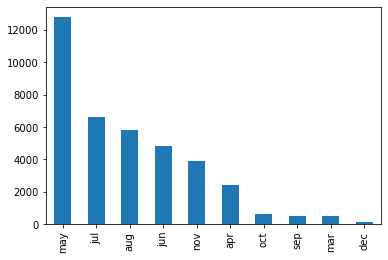

In [401]:
describeCategory("month")

> La mayoria de contactos con los clientes fue durante el mes de mayo. Es posible que esto se deba al contexto socio economico de Portugal de este mes.

       Positives  Negatives  Totals
month                              
apr          486       1950    2436
aug          596       5226    5822
dec           77         84     161
jul          599       6031    6630
jun          511       4335    4846
mar          252        245     497
may          830      11964   12794
nov          385       3513    3898
oct          297        362     659
sep          225        277     502




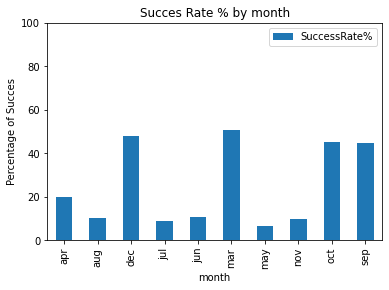

In [402]:
compareToOutput("month","bar")

> Vemos como hay meses con muchisimo mejor desempeño que otros. El gráfico anterior sugiere que los meses de diciembre, marzo, octubre y septiembre son los mas óptimos para realizar el contacto con los clientes

### Day of Week

_last contact day of the week (categorical: "mon","tue","wed","thu","fri")_

-----------------

> Descripción de la categoría:

count     38245
unique        5
top         thu
freq       8011
Name: day_of_week, dtype: object

-----------------

> Valores únicos de la categoría:

['mon' 'tue' 'wed' 'thu' 'fri']

-----------------

> Cantidad de outputs positivos por valor:

               y
day_of_week     
fri          771
mon          786
thu          962
tue          864
wed          875

-----------------

> Valores mas significativos:



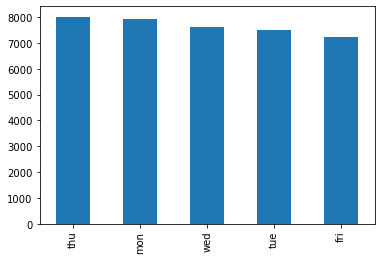

In [403]:
describeCategory("day_of_week")

> No parece haber una preferencia marcada para los llamados por dia de seamana

             Positives  Negatives  Totals
day_of_week                              
fri                771       6453    7224
mon                786       7141    7927
thu                962       7049    8011
tue                864       6617    7481
wed                875       6727    7602




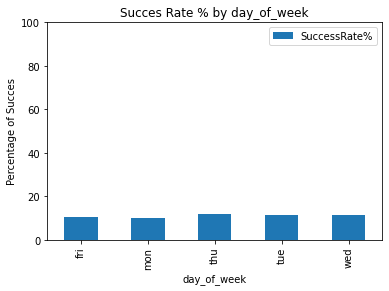

In [404]:
compareToOutput("day_of_week","bar")

> El impacto del dia de la semana sobre el output tambien parece estar bastante parejo, no hay una clara superioridad de ninguno de los valores

### Duration & Campaign

_Duration in Seconds_

_Number of times this client has been contacted during this campaing_

In [405]:
df[df["y"]==1]["duration"].mean()

556.073978393612

In [406]:
df[df["y"]==0]["duration"].mean()

220.88992850207433

> La media de los outcomes positivos es mucho mayor que la de los negativos, como era de esperarse

<AxesSubplot:xlabel='duration', ylabel='campaign'>

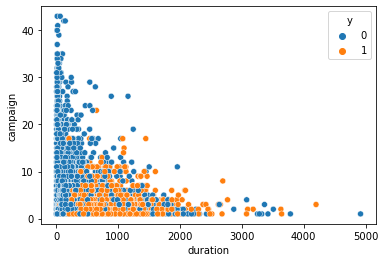

In [407]:
sns.scatterplot(x =df['duration'],y=df['campaign'],hue=df['y'])

> Es interesante resaltar como casi la totalidad de las llamadas de corta duración y una alta cantidad de contactos tuvieron un output negativo. Esto indica que no solo es probable que estos clientes no esten interesados ya que la llamada dura muy poco, sino que tambien molestarlos llamandolos muchas veces es perjudicial para que estos se suscriban.

> Se entiende tambien que a llamadas de mas larga duracion, mayor interes de los clientes en adquirir el producto y por lo tanto menor necesidad de realizar muchos llamados.

> Una baja cantidad de llamadas (low campaign) puede ser un buen indicador de un output positivo. A partir de las 15 llamadas casi no se observan exitos

### Pdays & Previous

pdays: Cantidad de dias que pasaron desde que el cliente fue contactado por ultima vez en una campaña anterior.(999 = nunca fue contactado)

previous: Cantidad de contactos realizados a este cliente en campañas anteriores.


In [408]:
df["pdays"].describe()

count    38245.000000
mean       963.531651
std        184.295254
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [409]:
df[df["pdays"]==999].count()/df.shape[0]

age               0.964283
job               0.964283
marital           0.964283
education         0.964283
housing           0.964283
loan              0.964283
contact           0.964283
month             0.964283
day_of_week       0.964283
duration          0.964283
campaign          0.964283
pdays             0.964283
previous          0.964283
poutcome          0.964283
emp.var.rate      0.964283
cons.price.idx    0.964283
cons.conf.idx     0.964283
euribor3m         0.964283
nr.employed       0.964283
y                 0.964283
AgeRange          0.964257
dtype: float64

> El 96% de los clientes fue contactado por primera vez en esta campaña!

<AxesSubplot:xlabel='pdays', ylabel='previous'>

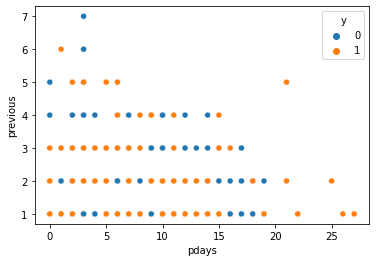

In [410]:
scatterdf = df[df["pdays"]!=999]
sns.scatterplot(x =scatterdf['pdays'],y=scatterdf['previous'],hue=scatterdf['y'])

       Positives  Negatives  Totals
pdays                              
0             10          5      15
1              8         16      24
2             34         23      57
3            263        130     393
4             53         53     106
5             28         17      45
6            266        113     379
7             35         17      52
8              9          5      14
9             28         27      55
10            26         18      44
11            14         12      26
12            23         30      53
13            26          7      33
14            10          8      18
15            16          6      22
16             5          3       8
17             1          5       6
18             2          3       5
19             1          2       3
21             2          0       2
22             2          2       3
25             1          0       1
26             1          0       1
27             1          0       1
999         3393      33486 

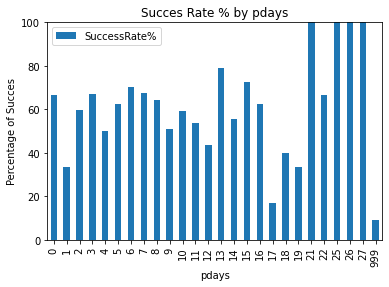

In [411]:
compareToOutput("pdays","bar")

> Vemos que, dentro de los clientes previamente contactados, es positivo esperar mas tiempo para la siguiente llamada. Notar como los valores cercanos a los 30 dias rondan en porcentajes de exito cercanos al 100%

          Positives  Negatives  Totals
previous                              
0              2922      30144   33066
1               870       3364    4234
2               306        366     672
3               117         78     195
4                30         27      57
5                11          5      16
6                 2          2       4
7                 0          1       1




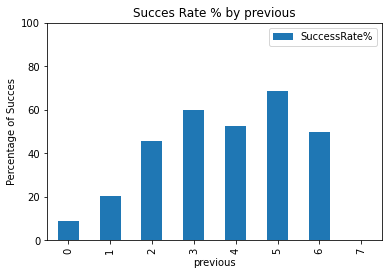

In [412]:
compareToOutput("previous","bar")

> Vemos una tendencia a suscribirse al servicio cuantas mas veces se ha contactado a los clientes en el pasado, ya sea por insistencia o por que el banco se gana su confianza

### Poutcome

_Resultado de las campañas anteriores para este cliente_

-----------------

> Descripción de la categoría:

count           38245
unique              3
top       nonexistent
freq            33066
Name: poutcome, dtype: object

-----------------

> Valores únicos de la categoría:

['nonexistent' 'failure' 'success']

-----------------

> Cantidad de outputs positivos por valor:

                y
poutcome         
failure       533
nonexistent  2922
success       803

-----------------

> Valores mas significativos:



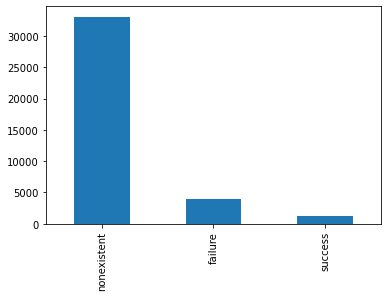

In [413]:
describeCategory("poutcome")

             Positives  Negatives  Totals
poutcome                                 
failure            533       3403    3936
nonexistent       2922      30144   33066
success            803        440    1243




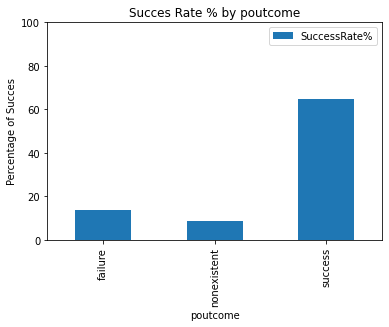

In [414]:
compareToOutput("poutcome","bar")

> En este caso se observa una clara tendencia a suscribirse en clientes con suscripciones anteriores. Esto habla bien del servicio que presta el banco ya que muchos de los clientes estan dispuestos a repetir su experiencia

### Socio - Economic Indicators

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


In [415]:
socioecdf = df[["month","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]]
monthlyOutput = socioecdf.groupby("month").agg({"y":"sum"})
monthlyOutput = monthlyOutput.to_dict(orient="dict")
monthlyOutput = monthlyOutput["y"]
socioecdf["PositiveCount"] = socioecdf["month"].map(monthlyOutput)
socioecdf

<ipython-input-415-d2e8e1391bb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socioecdf["PositiveCount"] = socioecdf["month"].map(monthlyOutput)


,month,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,PositiveCount
0,may,1.1,93.994,-36.4,4.857,5191.0,0,830
1,may,1.1,93.994,-36.4,4.857,5191.0,0,830
2,may,1.1,93.994,-36.4,4.857,5191.0,0,830
3,may,1.1,93.994,-36.4,4.857,5191.0,0,830
4,may,1.1,93.994,-36.4,4.857,5191.0,0,830
...,...,...,...,...,...,...,...,...
41183,nov,-1.1,94.767,-50.8,1.028,4963.6,1,385
41184,nov,-1.1,94.767,-50.8,1.028,4963.6,0,385
41185,nov,-1.1,94.767,-50.8,1.028,4963.6,0,385
41186,nov,-1.1,94.767,-50.8,1.028,4963.6,1,385


<AxesSubplot:xlabel='month', ylabel='PositiveCount'>

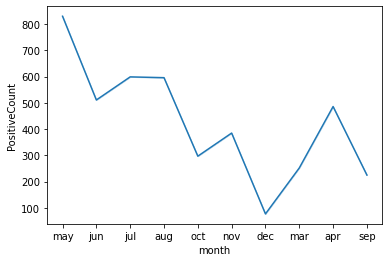

In [416]:
sns.lineplot(data=socioecdf, x="month", y="PositiveCount")

<AxesSubplot:xlabel='month', ylabel='emp.var.rate'>

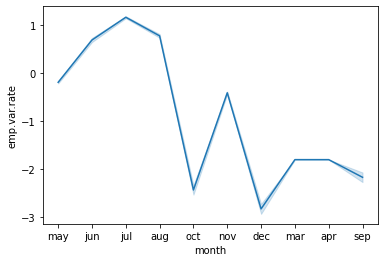

In [417]:
sns.lineplot(data=socioecdf, x="month", y="emp.var.rate")

<AxesSubplot:xlabel='month', ylabel='cons.price.idx'>

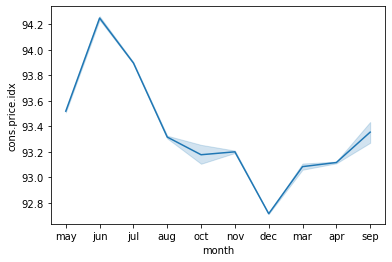

In [418]:
sns.lineplot(data=socioecdf, x="month", y="cons.price.idx")

<AxesSubplot:xlabel='month', ylabel='cons.conf.idx'>

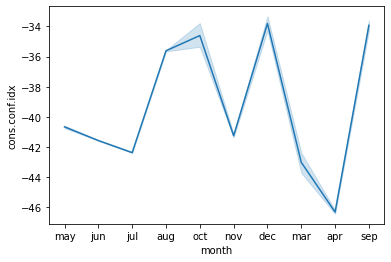

In [419]:
sns.lineplot(data=socioecdf, x="month", y="cons.conf.idx")

<AxesSubplot:xlabel='month', ylabel='euribor3m'>

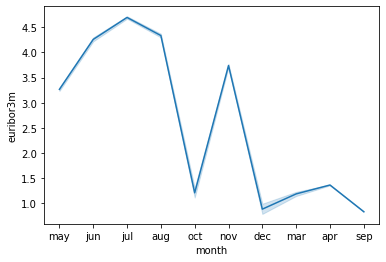

In [420]:
sns.lineplot(data=socioecdf, x="month", y="euribor3m")

<AxesSubplot:xlabel='month', ylabel='nr.employed'>

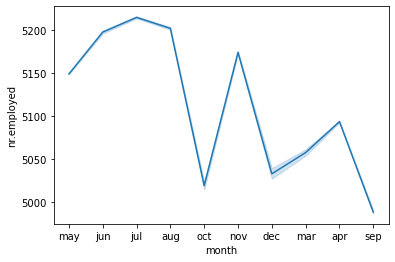

In [421]:
sns.lineplot(data=socioecdf, x="month", y="nr.employed")

<AxesSubplot:>

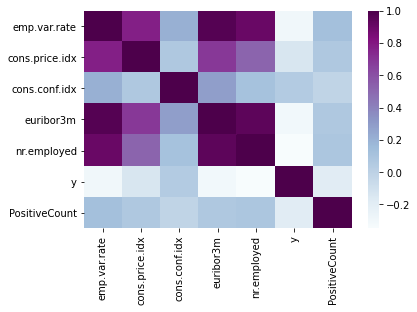

In [422]:
cor = socioecdf.corr()
sns.heatmap(cor, cmap="BuPu")

In [423]:
print(cor["PositiveCount"])

emp.var.rate      0.129361
cons.price.idx    0.070724
cons.conf.idx    -0.012755
euribor3m         0.072957
nr.employed       0.084017
y                -0.181436
PositiveCount     1.000000
Name: PositiveCount, dtype: float64


> Observamos como la cantidad de casos positivos por mes se ve afectada en mayor medida por los indices de precios y el _employment rate dispersion_ (Google: is the coefficient of variation of regional employment rates in a country, weighted by the absolute population (active population) of each region). Sin embargo, el r2 sigue siendo bajo con tan solo 0.14. No parece haber una correlación evidente entre los indices y la cantidad de suscripciones mensuales.

# 🧠🧑‍💻 Modelo de Clasificación


En la siguiente sección se entrenarán y evaluaran distintos modelos de clasificación con el objetivo de predecir si los clientes se suscribirán o no al servicio del banco.

Para la implementación de los modelos de clasificación se utilizará la librería Scikit Learn, herramienta muy utilizada en Machine Learning.

Los modelos que se entrenarán y compararán son:

- Logistic Regression
- Decision Tree
- Naive Bayes

> Previo al modelado de los datos, será necesario expresar las variables categóricas de manera numerica para que puedan ser evaluadas correctamente por el modelo. Para esto, utilizaremos _dummy variables_ (one hot encoding)

In [424]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# -- Modelos
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
# SVM
from sklearn.svm import SVC
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

modeldf = df

modeldf = pd.get_dummies(modeldf, columns = ['contact','month','day_of_week','poutcome','job','marital','education','housing','loan'])
modeldf.drop(["y","AgeRange"],axis = 1,inplace = True)


_Importante! Vamos a eliminar la categoría Duration para obtener un modelo predicitivo mas realista. Ver lo mencionado en_ 

> "duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."

In [425]:
modeldf.drop("duration", axis = 1, inplace = True)

X = modeldf # Features
Y = df["y"].to_numpy() # target variable

X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_cellular,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_no,housing_yes,loan_no,loan_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,0,1,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,1,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,1,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,1,0,0,1


> A continuación se realizará una _normalización_ (normal) de los datos a través del módulo integrado de sklearn.

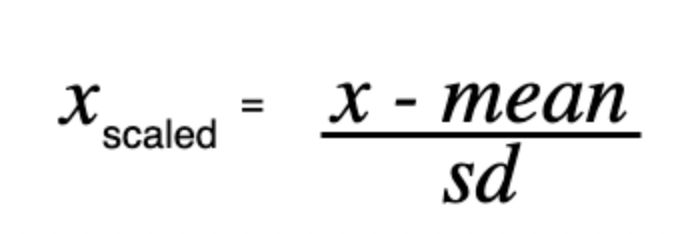

In [426]:
from sklearn import preprocessing
from sklearn import metrics 

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[ 1.56852703, -0.56610584,  0.19245646, ..., -1.07924533,
         0.42961513, -0.42961513],
       [ 1.66571486, -0.56610584,  0.19245646, ..., -1.07924533,
         0.42961513, -0.42961513],
       [-0.27804183, -0.56610584,  0.19245646, ...,  0.92657339,
         0.42961513, -0.42961513],
       ...,
       [ 1.56852703, -0.20476068,  0.19245646, ...,  0.92657339,
         0.42961513, -0.42961513],
       [ 0.40227301, -0.56610584,  0.19245646, ..., -1.07924533,
         0.42961513, -0.42961513],
       [ 3.31790805,  0.15658448,  0.19245646, ...,  0.92657339,
         0.42961513, -0.42961513]])

> El siguiente paso será dividir nuestro dataset con un test-train split. El objetivo de esto es aumentar la precisión real (out of sample) de nuestros modelos, evaluarlos de forma correcta y evitar el overfitting (extrema precisión in-sample, baja out of sample).

> Se utilizara un metodo de Cross Validation (integrado en sklearn) para aumentar la precisión de los modelos y para encontrar los mejores hiperparametros de los mismos.

In [427]:
# test train split con un 20% de los datos destinados a testing y un 80% a train+validation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print ('Train set: ', X_train.shape,  Y_train.shape)
print ('Test set: ', X_test.shape,  Y_test.shape)

Train set:  (30596, 54) (30596,)
Test set:  (7649, 54) (7649,)


In [428]:
# listas para guardar los resultados de las evaluaciones de los modelos:
testAccuracyScores = []
f1Scores = []

In [429]:
def plotConfusionMatrix(y,y_predict):
    "Plotear confussion matrix para los modelos"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    print(cm)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['No suscripto', 'Suscripto'])
    ax.yaxis.set_ticklabels(['No suscripto', 'Suscripto'])


Teniendo nuestro dataset dividido, podemos empezar a entrenar los distintos modelos

## 1) Logistic Regression

In [430]:
parameters ={'C':[0.01,0.03,0.1,0.3,1],
            'penalty':['l2'],
             'solver':['lbfgs']}
lr = LogisticRegression()

# El modulo GridSearchCV evalua las diferentes combinaciones de hiperparametros para nuestro modelo y realiza una Cross Validation
logreg_cv = GridSearchCV(lr,parameters,cv=10) # CV = cantidad de folds para cross validation

# Fiteamos el modelo (entrenamos) con los features
logreg_cv.fit(X_train, Y_train) 

print("Hyperparameters: (Mejores Parametros) ",logreg_cv.best_params_) # Mejores parametros 
print("Validation Accuracy:",round(logreg_cv.best_score_,3)) # accuracy in sample, sera menor que la del test data set.

Hyperparameters: (Mejores Parametros)  {'C': 0.03, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy: 0.901


In [431]:
# el metodo score calcula, sobre el test dataset, la cantidad de bien predecidos / totales
lr_accuracy = logreg_cv.score(X_test,Y_test)
print("Linear Regression test accuracy: ", round(lr_accuracy,3))
testAccuracyScores.append(lr_accuracy)

Linear Regression test accuracy:  0.898


In [432]:
# calculo el F1 score entre los valores reales y los del modelo
yhat=logreg_cv.predict(X_test)
f1_lr = metrics.f1_score(Y_test,yhat)
f1Scores.append(f1_lr)

print("El F1 Score del modelo es: ", f1_lr.round(3), "(Mayor es mejor)")

El F1 Score del modelo es:  0.312 (Mayor es mejor)


_Breve explicación del F1 Score. Fuente: IBM Data Science Professional Certificate_

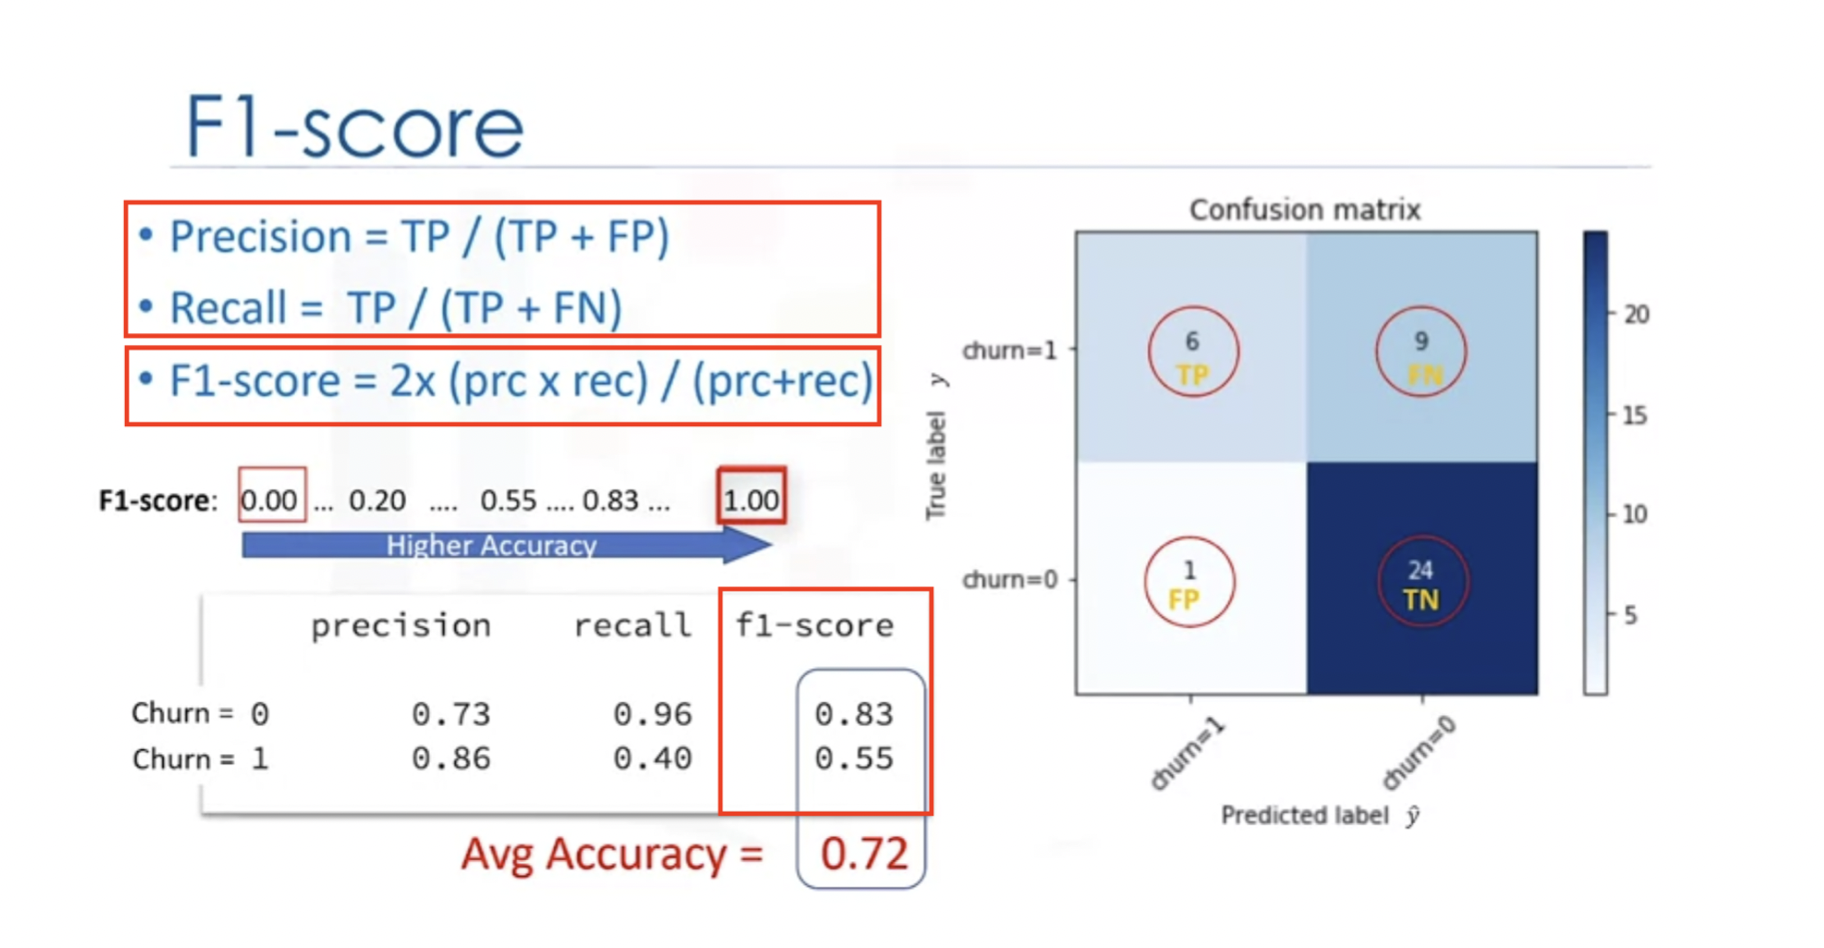

[[6696   97]
 [ 680  176]]


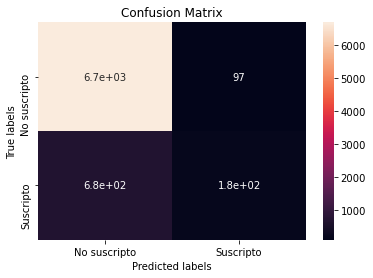

In [433]:
plotConfusionMatrix(Y_test,yhat)

> Observando la matriz vemos que donde peor performa el modelo es en falsos negativos, con un total de 680 casos categorizados como negativos cuando en realidad eran positivos. 

## 2) Decision Tree

In [434]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [435]:
# El modulo GridSearchCV evalua las diferentes combinaciones de hiperparametros para nuestro modelo y realiza una Cross Validation
tree_cv = GridSearchCV(tree, parameters, cv = 10)
# Fiteamos el modelo (entrenamos) con los features
tree_cv.fit(X_train, Y_train)

print("Hyperparameters: (Mejores Parametros) ",tree_cv.best_params_) # Mejores parametros 
print("Validation Accuracy:",round(tree_cv.best_score_,3)) # accuracy in sample, sera menor que la del test data set.

Hyperparameters: (Mejores Parametros)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Validation Accuracy: 0.901


In [436]:
# el metodo score calcula, sobre el test dataset, la cantidad de bien predecidos / totales
tree_accuracy = tree_cv.score(X_test,Y_test)
print("Decision Tree test accuracy: ", round(tree_accuracy,3))
testAccuracyScores.append(tree_accuracy)

Decision Tree test accuracy:  0.898


In [437]:
# calculo el F1 score entre los valores reales y los del modelo
yhat= tree_cv.predict(X_test)
f1_tree = metrics.f1_score(Y_test,yhat)
f1Scores.append(f1_tree)

print("El F1 Score del modelo es: ", f1_tree.round(3), "(Mayor es mejor)")

El F1 Score del modelo es:  0.312 (Mayor es mejor)


[[6693  100]
 [ 679  177]]


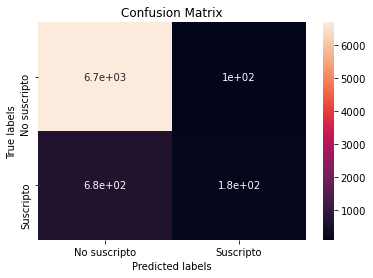

In [438]:
plotConfusionMatrix(Y_test,yhat)

> Peor performance en falsos positivos, con un total de 270 casos categorizados como positivos cuando en realidad eran negativos. Esto se ve reflejado en el F1 score (menor, peor)

### 3) Naive Bayes

In [446]:
nb = GaussianNB()

In [440]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_cv = GridSearchCV(estimator=nb, 
                     param_grid=params_NB, 
                     cv=10)
nb_cv.fit(X_train, Y_train)

print("Hyperparameters: (Mejores Parametros) ",nb_cv.best_params_) # Mejores parametros 
print("Validation Accuracy:",round(nb_cv.best_score_,3)) # accuracy in sample, sera menor que la del test data set.

Hyperparameters: (Mejores Parametros)  {'var_smoothing': 1.0}
Validation Accuracy: 0.885


In [441]:
# el metodo score calcula, sobre el test dataset, la cantidad de bien predecidos / totales
nb_accuracy = nb_cv.score(X_test,Y_test)
print("Naive Bayes test accuracy: ", round(nb_accuracy,3))
testAccuracyScores.append(nb_accuracy)

Naive Bayes test accuracy:  0.881


In [442]:
# calculo el F1 score entre los valores reales y los del modelo
yhat= nb_cv.predict(X_test)
f1_nb = metrics.f1_score(Y_test,yhat)
f1Scores.append(f1_nb)

print("El F1 Score del modelo es: ", f1_nb.round(3), "(Mayor es mejor)")

El F1 Score del modelo es:  0.405 (Mayor es mejor)


[[6433  360]
 [ 547  309]]


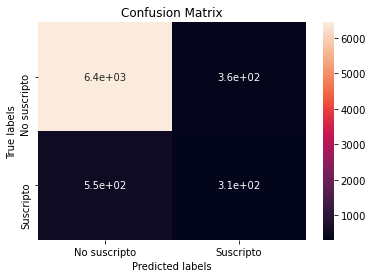

In [443]:
plotConfusionMatrix(Y_test,yhat)

> Tiene mejor performance en falsos negativos pero peor en falsos positivos. El F1 da la overall performance 

# 🥇🥈🥉 Comparación de los Modelos

(0.0, 1.0)

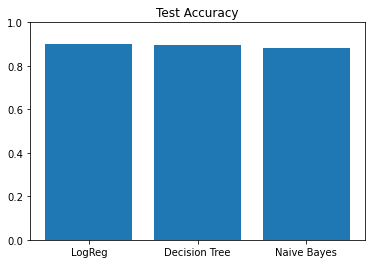

In [444]:
models = ["LogReg", "Decision Tree", "Naive Bayes"]

# Test model accuracy
plt.bar(models, testAccuracyScores, width=0.8, bottom=None,align='center')
plt.title("Test Accuracy")
plt.ylim(0,1)

(0.0, 1.0)

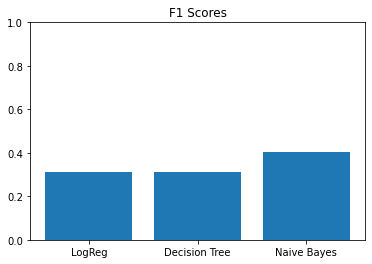

In [445]:
# F1 scores
plt.bar(models, f1Scores, width=0.8, bottom=None,align='center')
plt.title("F1 Scores")
plt.ylim(0,1)

> Analizando los datos de _accuracy_ vemos que los 3 modelos planteados tienen una performance similar. Sin embargo, si ponemos atención en los resultados del F1Score, que resume el comportamiento de los modelos sobre los falsos positivos/negativos, vemos que el modelo de Bayes Ingenuo es superior a los otros dos. 

# 📝💡Conclusiones 

#### Conclusiones del análisis de las categorías y recomendaciones para el cliente

- Como era sabido desde antes del análisis, la duración de la llamada es determinante para que los clientes se suscriban. La mayoría de los casos positivos tuvieron llamadas de apreciable duración. Esta variable sin embargo, no es útil para predecir resultados ya que se conoce al mismo tiempo que éstos.
- Los estudiantes y los jubilados tienden a ser quienes más se suscriben al servicio, seria una buena idea que el departamento de marketing centrara sus esfuerzos en comprender las necesidades e intereses de estos dos grupos para aumentar aún mas las suscripciones entre ellos.
- Durante las campañas en curso, es prudente que el personal no sea insistente a la hora de realizar llamadas. Un cliente a quien se lo llamó muchas veces durante una misma campaña tiende a no suscribrse al servicio y a cortar de forma prematura. (Casi no se observan éxitos para clientes a quienes se los llamo mas de 15 veces)
- Si se decidiera repetir una llamada a un cliente específico, los datos indican que lo mas efectivo es esperar al rededor de 30 días. Los clientes a los que se volvió a llamar en un lapso de ~30 días registraron mayores suscripciones.
- Los clientes contactados previamente (_en otras campañas_) tienden a aceptar mas las suscripciones al servicio, por lo que es prudente no descartar clientes de _campañas anteriores_ por mas de que ya hayan sido contactados.
- La tasa de éxito de clientes previamente suscriptos al servicio es muy alta. El cliente debe explotar esta información y seguir ofreciendo servicios a sus clientes activos. Esto también habla muy bien de su producto y servicio.


#### Conclusiones sobre los modelos predictivos

- El modelo que mejor performance obtuvo fue el de Bayes Ingenuo. El cliente puede ahora hacer uso de la potencia del Machine Learning para testear sus campañas de Marketing con antelación, ahorrar costos en estrategias que no funcionen y maximizar sus ganancias.

#### Próximos pasos y posibles mejoras

- Es altamente recomendable que el cliente siga almacenando los datos de sus campañas futuras para seguir entrenando al modelo y aumentar la precisión de éste.
- Seria interesante estudiar la performance de otros modelos de clasificación y/o incluir otros hyperparametros al entrenamiento de los modelos.
- Entrenar los modelos en la nube (Servicios cloud como aws, GCP, etc) permitiría ahorrar tiempos de entrenamiento de los modelos, escalarlos y hasta entrenar modelos que de forma local (en nuestras computadoras) seria imposible. 
- El cliente podría verse beneficiado de la aplicación de modelos de clustering, como K-means, para segmentar sus clientes y descubrir insights que podrían permanacer ocultos a los ojos de los analistas humanos.